# <center>Air Quality Dataset</center>

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime

In [23]:
data=pd.read_excel('AirQualityUCI.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


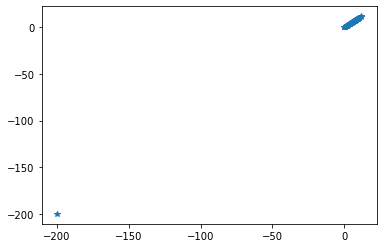

In [60]:
CO_vals=data['CO(GT)'].unique()

import matplotlib.pyplot as plt
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(1, 1, 1)
ax.plot(CO_vals,CO_vals, '*')

## Cleaning Data

So clearly, there are a few anomalies in the dataset. For e.g in the above figure we see an anomalous reading of -200 for 'CO(GT)'. We will remove the anomalous values and replace it with a summary statistic that best corresponds to the date and time.

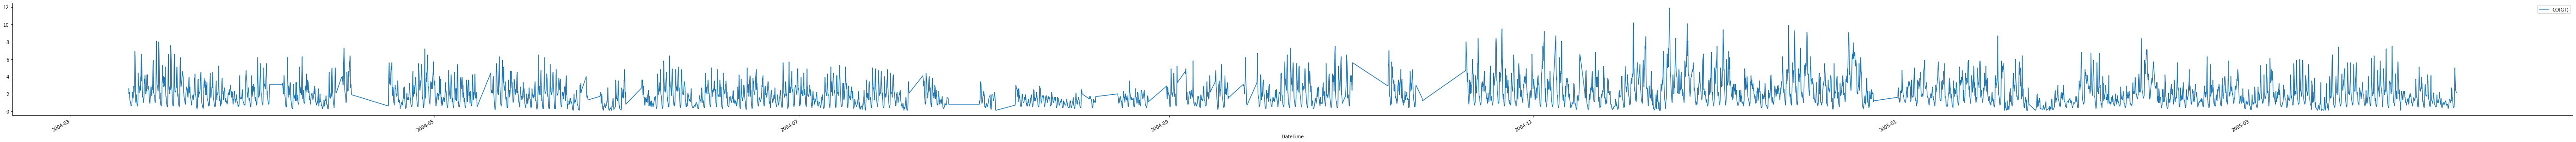

In [58]:
data_c=data.copy()
data_c_CO=data_c.loc[data['CO(GT)']!=-200]

date_time=pd.Series(data_c['Date'].astype(str)+' '+data_c['Time'].astype(str))
date_time=pd.to_datetime(date_time)
data_c.insert(0, "DateTime", date_time)

#Now plot the CO measurements
cols=list(data_c.columns)
ax=data_c.plot(x='DateTime', y=cols[3], figsize=(100,5))

In [50]:
data_c=data.copy()

corrM=data_c.corr()

for cols in corrM.columns:
    print(corrM.nlargest(4, cols))

            CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)    1.000000     0.041415  0.128351 -0.031377       0.029939  0.526450   
NO2(GT)   0.671140     0.154058  0.103345 -0.010971       0.176569  0.817138   
NOx(GT)   0.526450     0.278029 -0.004413 -0.001163       0.331331  1.000000   
NMHC(GT)  0.128351     0.170009  1.000000  0.037329       0.110097 -0.004413   

          PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)       -0.089981  0.671140     -0.073721     0.080316 -0.068952   
NO2(GT)      -0.256217  1.000000     -0.022092     0.253469 -0.084084   
NOx(GT)      -0.436083  0.817138      0.035580     0.461916 -0.138457   
NMHC(GT)      0.048832  0.103345      0.162689     0.101189 -0.000008   

                RH        AH  
CO(GT)   -0.048231 -0.045892  
NO2(GT)  -0.081300 -0.060423  
NOx(GT)  -0.053008 -0.095841  
NMHC(GT)  0.008288  0.012500  
                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
PT0

## Hourly Analysis
Now take the hourly average for the duration of the dataset. Take a particular hour and average over all dates.

In [5]:
data_c=data.copy()
time=data_c['Time'].unique()

data_hourly=pd.DataFrame()
for t in time:
    data_h=data_c.loc[data_c['Time']==t]
    data_h=data_h.drop(columns=['Date','Time'])
    data_h=pd.DataFrame(data_h.mean(axis=0))
    data_h=data_h.transpose()
    data_h.insert(0, "Time", t)
    data_hourly=data_hourly.append(data_h)    

data_hourly.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18:00:00,-26.296667,1187.476709,-140.941026,7.195912,1105.511538,274.401795,653.837179,98.006923,1570.132051,1156.943376,11.578141,30.713397,-7.752530
0,19:00:00,-25.520769,1209.529060,-132.058974,7.127923,1132.834188,287.333333,621.855983,102.503333,1601.020299,1222.778205,9.106026,32.674530,-8.766642
0,20:00:00,-26.268718,1179.967094,-139.212821,5.996282,1077.008547,274.465385,648.540812,98.213077,1548.340171,1203.712821,9.187970,36.911966,-7.722273
0,21:00:00,-27.529487,1087.725641,-158.902564,1.888303,945.753846,221.596667,721.270940,85.072564,1420.285897,1079.280983,8.339509,39.240983,-7.718662
0,22:00:00,-29.096410,1037.677778,-165.815385,-0.130853,872.412179,160.181282,771.697863,70.634872,1358.208761,997.088034,7.702372,41.044701,-7.716027


<AxesSubplot:xlabel='Time'>

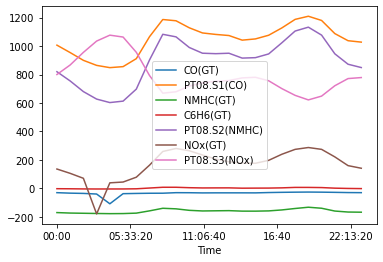

In [6]:
%matplotlib inline

cols=list(data_hourly.columns)
N=4
x="Time"
ax=data_hourly.plot(x=x, y=cols[1])
data_hourly.plot(x=x, y=cols[2],ax=ax)
data_hourly.plot(x=x, y=cols[3],ax=ax)
data_hourly.plot(x=x, y=cols[4],ax=ax)
data_hourly.plot(x=x, y=cols[5],ax=ax)
data_hourly.plot(x=x, y=cols[6],ax=ax)
data_hourly.plot(x=x, y=cols[7],ax=ax)

Now see how the hourly changes vary for each month

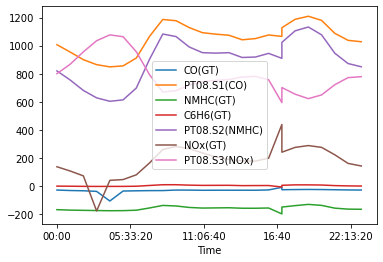

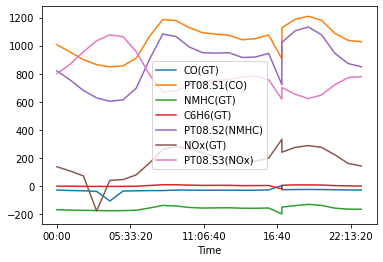

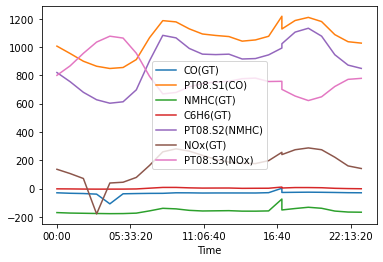

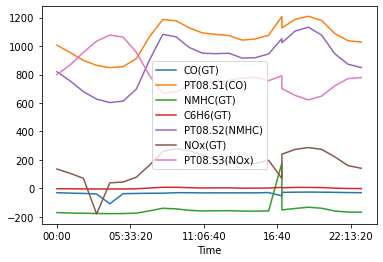

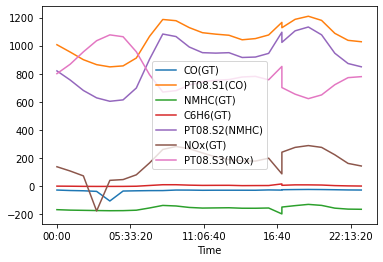

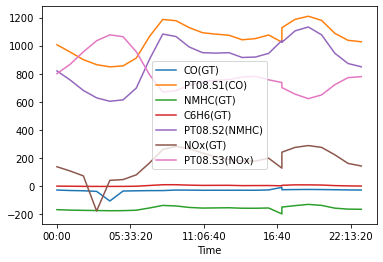

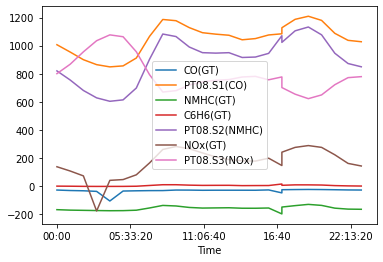

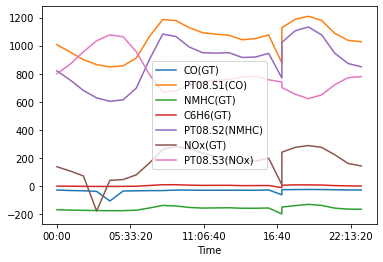

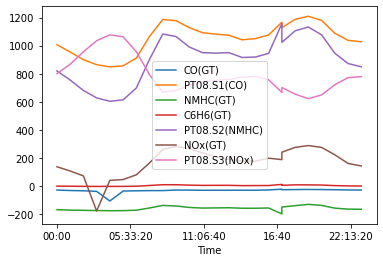

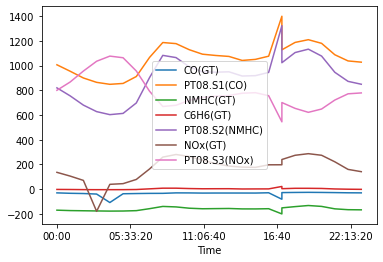

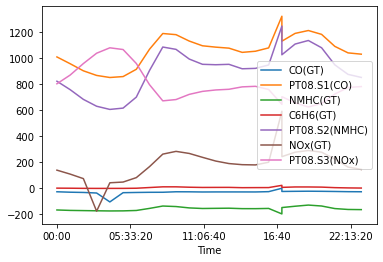

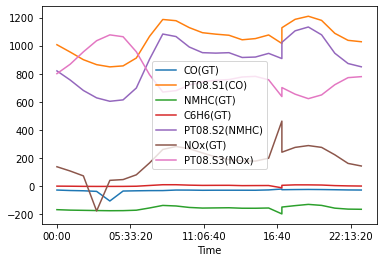

In [16]:
%matplotlib inline
data_c=data.copy()
data_c['Month']=data_c['Date'].dt.month
months=data_c['Month'].unique()
months.sort()


def gen_df_hrly_mnth(month, data_c):
    time=data_c['Time'].unique()
    d_month_hourly=pd.DataFrame()
    for t in time:
        data_h=data_c.loc[(data_c['Time']==t) & (data_c['Month']==month)]
        if not data_h.empty:
            data_h=data_h.drop(columns=['Date','Time'])
            data_h=pd.DataFrame(data_h.mean(axis=0))
            data_h=data_h.transpose()
            data_h.insert(0, "Time", t)
            d_month_hourly=data_hourly.append(data_h)
            
            
    return d_month_hourly

def gen_plots_hrly_mnth(months,data_c):
    for m in months:
        d_month_hourly = gen_df_hrly_mnth(m, data_c)

        if not d_month_hourly.empty:
            cols=list(data_hourly.columns)
            x="Time"
            ax=d_month_hourly.plot(x=x, y=cols[1])
            d_month_hourly.plot(x=x, y=cols[2],ax=ax)
            d_month_hourly.plot(x=x, y=cols[3],ax=ax)
            d_month_hourly.plot(x=x, y=cols[4],ax=ax)
            d_month_hourly.plot(x=x, y=cols[5],ax=ax)
            d_month_hourly.plot(x=x, y=cols[6],ax=ax)
            d_month_hourly.plot(x=x, y=cols[7],ax=ax)
            
gen_plots_hrly_mnth(months,data_c)


In [12]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## Daily Analysis

We want to see how the measurements vary day-to-day.

Take the daily average. Take a date and average over all the hours for each day.

In [4]:
data_c=data.copy()
date=data_c['Date'].unique()

data_daily=pd.DataFrame()

for d in date:
    data_d=data_c.loc[data_c['Date']==d]
    data_d=data_d.drop(columns=['Date','Time'])
    data_d=pd.DataFrame(data_d.mean(axis=0))
    data_d=data_d.transpose()
    data_d.insert(0, "Date", d)
    data_daily=data_daily.append(data_d)    

data_daily.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626
0,2004-03-11,-6.187500,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,0.775768
0,2004-03-12,-14.095833,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,0.663102
0,2004-03-13,-5.750000,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,0.732294
0,2004-03-14,-5.966667,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,0.849674


<AxesSubplot:xlabel='Date'>

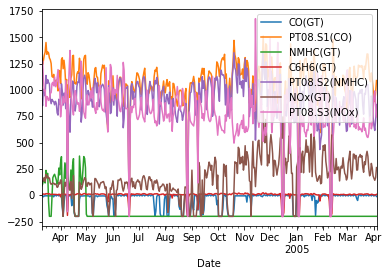

In [5]:
%matplotlib inline

cols=list(data_hourly.columns)
N=4
x="Date"
ax=data_daily.plot(x=x, y=cols[1])
data_daily.plot(x=x, y=cols[2],ax=ax)
data_daily.plot(x=x, y=cols[3],ax=ax)
data_daily.plot(x=x, y=cols[4],ax=ax)
data_daily.plot(x=x, y=cols[5],ax=ax)
data_daily.plot(x=x, y=cols[6],ax=ax)
data_daily.plot(x=x, y=cols[7],ax=ax)

In [6]:
cols

['Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

Now take the Monthly average. Average for 1 month for all years.

In [166]:
data_c=data.copy()
months=[1,2,3,4,5,6,7,8,9,10,11,12]
data_c['Month']=data_c['Date'].dt.month

data_monthly=pd.DataFrame()

for m in months:
    data_m=data_c.loc[data_c['Month']==m]
    data_m=data_m.drop(columns=['Date','Time','Month'])
    data_m=pd.DataFrame(data_m.mean(axis=0))
    data_m=data_m.transpose()
    data_m.insert(0, "Month", m)
    data_monthly=data_monthly.append(data_m)    

data_monthly

,Month,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1,-16.339651,1003.352599,-200.000000,-8.111964,802.123208,324.640188,711.071573,119.445161,1042.383961,991.064740,-8.851680,35.528506,-15.814823
0,2,-0.610417,941.955977,-200.000000,-15.966164,724.292783,292.003125,679.688616,144.533780,915.286830,892.762773,-16.312587,23.571701,-22.160113
0,3,-3.981499,1175.632908,-79.391547,9.051606,906.298246,231.485726,838.591175,114.740750,1365.095627,1059.697435,13.522721,50.406572,0.624744
0,4,-54.717596,1094.572181,86.339529,2.692976,883.615964,45.412639,893.619269,12.086493,1481.672553,925.144052,9.530184,40.676735,-5.833738
0,5,-39.316532,1052.532370,-199.361559,6.263190,929.319444,58.918011,925.776994,35.622312,1567.100358,906.856967,16.134890,38.957952,-2.824123
0,6,-19.411667,956.241435,-200.000000,-0.519794,904.700694,90.305556,842.273495,64.676389,1620.800694,877.460532,14.521481,27.189063,-9.347490
0,7,-48.661290,1044.621192,-200.000000,10.315220,969.761089,112.700269,803.412970,90.631720,1641.220206,992.716846,29.110170,32.741521,0.972224
0,8,-70.953495,903.146729,-200.000000,-6.639981,769.968862,-13.862903,767.504704,-18.119624,1463.533042,712.882616,14.039819,26.974899,-11.659263
0,9,-43.884306,1049.415394,-200.000000,6.266196,963.527199,96.352778,785.024653,-10.037500,1502.940856,1005.385301,19.005671,37.889248,-3.746709
0,10,-92.915591,1182.934140,-200.000000,13.237625,1056.619512,79.850806,686.830197,-49.270161,1634.360999,1161.890569,20.200090,61.557785,1.193300


<AxesSubplot:xlabel='Month'>

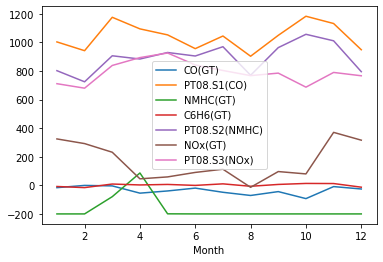

In [171]:
%matplotlib inline

cols=list(data_monthly.columns)
N=4
x="Month"
ax=data_monthly.plot(x=x, y=cols[1])
data_monthly.plot(x=x, y=cols[2],ax=ax)
data_monthly.plot(x=x, y=cols[3],ax=ax)
data_monthly.plot(x=x, y=cols[4],ax=ax)
data_monthly.plot(x=x, y=cols[5],ax=ax)
data_monthly.plot(x=x, y=cols[6],ax=ax)
data_monthly.plot(x=x, y=cols[7],ax=ax)

Now average all the data over every month.

In [202]:
data_c=data.copy()
data_c['Month']=data_c['Date'].dt.month
data_c['Year']=data_c['Date'].dt.year
data_monthly=pd.DataFrame()
months=data_c['Month'].unique()
months.sort()
years=data_c['Year'].unique()
for y in years:
    for m in months:
        data_m=data_c.loc[(data_c['Year']==y) & (data_c['Month']==m)]
        if not data_m.empty:
            data_m=data_m.drop(columns=['Date','Time','Month','Year'])
            data_m=pd.DataFrame(data_m.mean(axis=0))
            data_m=data_m.transpose()
            data_m.insert(0, "Date", str(y)+'-'+str(m))
            data_monthly=data_monthly.append(data_m)    

data_monthly

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-3,-4.847647,1222.685784,96.554902,9.935104,935.540686,128.676471,1029.058987,89.529412,1571.943301,1027.379902,14.390114,50.169559,0.789412
0,2004-4,-60.916111,1111.609954,120.938889,2.500562,905.970139,29.688889,892.929861,0.394444,1542.734606,958.785185,8.668588,41.305023,-6.613757
0,2004-5,-39.316532,1052.532370,-199.361559,6.263190,929.319444,58.918011,925.776994,35.622312,1567.100358,906.856967,16.134890,38.957952,-2.824123
0,2004-6,-19.411667,956.241435,-200.000000,-0.519794,904.700694,90.305556,842.273495,64.676389,1620.800694,877.460532,14.521481,27.189063,-9.347490
0,2004-7,-48.661290,1044.621192,-200.000000,10.315220,969.761089,112.700269,803.412970,90.631720,1641.220206,992.716846,29.110170,32.741521,0.972224
0,2004-8,-70.953495,903.146729,-200.000000,-6.639981,769.968862,-13.862903,767.504704,-18.119624,1463.533042,712.882616,14.039819,26.974899,-11.659263
0,2004-9,-43.884306,1049.415394,-200.000000,6.266196,963.527199,96.352778,785.024653,-10.037500,1502.940856,1005.385301,19.005671,37.889248,-3.746709
0,2004-10,-92.915591,1182.934140,-200.000000,13.237625,1056.619512,79.850806,686.830197,-49.270161,1634.360999,1161.890569,20.200090,61.557785,1.193300
0,2004-11,-8.856389,1132.038773,-200.000000,12.512374,1011.080093,370.438889,789.762269,94.758333,1372.112037,1171.240625,13.482384,59.272222,0.939992
0,2004-12,-25.590323,948.593974,-200.000000,-13.027542,795.069444,315.928763,766.481631,71.215054,1064.518481,944.656586,-11.565435,30.099037,-20.808760


<AxesSubplot:xlabel='Date'>

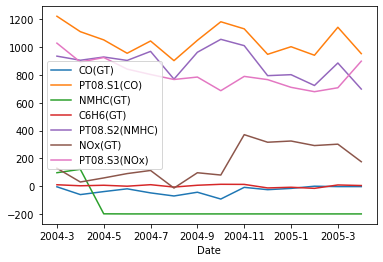

In [203]:
%matplotlib inline

cols=list(data_monthly.columns)
N=4
x="Date"
ax=data_monthly.plot(x=x, y=cols[1])
data_monthly.plot(x=x, y=cols[2],ax=ax)
data_monthly.plot(x=x, y=cols[3],ax=ax)
data_monthly.plot(x=x, y=cols[4],ax=ax)
data_monthly.plot(x=x, y=cols[5],ax=ax)
data_monthly.plot(x=x, y=cols[6],ax=ax)
data_monthly.plot(x=x, y=cols[7],ax=ax)

In [200]:
months

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)